# Histogram (Distribution of Continuous Data)

A histogram is a graphical representation that organizes a group of data points into ranges. 

These ranges are typically called "bins". By default, bins are of equal size and are computed based on the difference between the maximum and minimum values in the dataset.

i.e. 

$$ \text{Bin Width} = \frac{\text{Max Value} - \text{Min Value}}{\text{Number of Bins}} $$

Each bin: 

$$ [\text{\color{yellow}{Bin Start}}, \text{\color{red}{Bin End}}) = [\color{yellow}{\text{Min Value} + i \times \text{Bin Width}}, \color{red}{\text{Min Value} + (i + 1) \times \text{Bin Width}}) $$

where $i$ is the bin index starting from 0.

Alternatively, progrmmatically, it can be calculated using the following pseudocode:

```python 

data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

number_of_bins = 4

max_value = max(data)
min_value = min(data)

bin_width = max_value - min_value / number_of_bins

for i in range(number_of_bins):
    bin_start = min_value + i * bin_width
    bin_end = min_value + (i + 1) * bin_width
    print(f"Bin {i}: [{bin_start}, {bin_end})")
```

It is used to visualize the distribution of numerical data by showing the frequency of data points that fall within each range (or "bin").

By default, histograms display the frequency (count) of data points in each bin. However, they can also be configured to show relative frequency (proportion of total data points) or density (frequency per unit on the x-axis).

In [1]:
from matplotlib import pyplot as plt
import pandas as pd 

url = "https://raw.githubusercontent.com/fahadsultan/csc272/main/data/elections.csv"

elections = pd.read_csv(url)

In [3]:
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


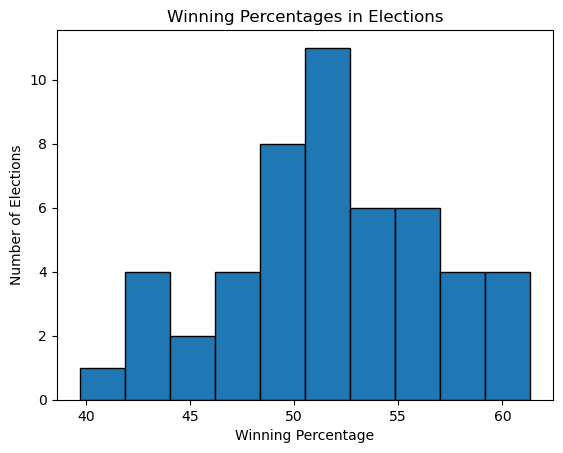

In [10]:
winners = elections[elections['Result'] == 'win']

fig, ax = plt.subplots()

ax.hist(winners['%'], bins=10, edgecolor='black');
ax.set_title('Winning Percentages in Elections')
ax.set_xlabel('Winning Percentage')
ax.set_ylabel('Number of Elections');

## 2D Histogram

A 2D histogram is an extension of the traditional histogram that represents the joint distribution of two continuous variables.

In a 2D histogram, the data is divided into bins along both the x-axis and y-axis, creating a grid of rectangular bins. Each bin counts the number of data points that fall within its range for both variables.

The height (or color intensity) of each bin represents the frequency of data points that fall within that bin's range for both variables.

For example, consider a dataset with two continuous variables, X and Y. A 2D histogram would divide the range of X into several bins along the x-axis and the range of Y into several bins along the y-axis. Each bin in the resulting grid would then count how many data points fall within the corresponding ranges of X and Y. 

The resulting 2D histogram can be visualized using a heatmap, where the color intensity of each bin indicates the frequency of data points in that bin. This allows for easy identification of patterns, correlations, and distributions between the two variables.

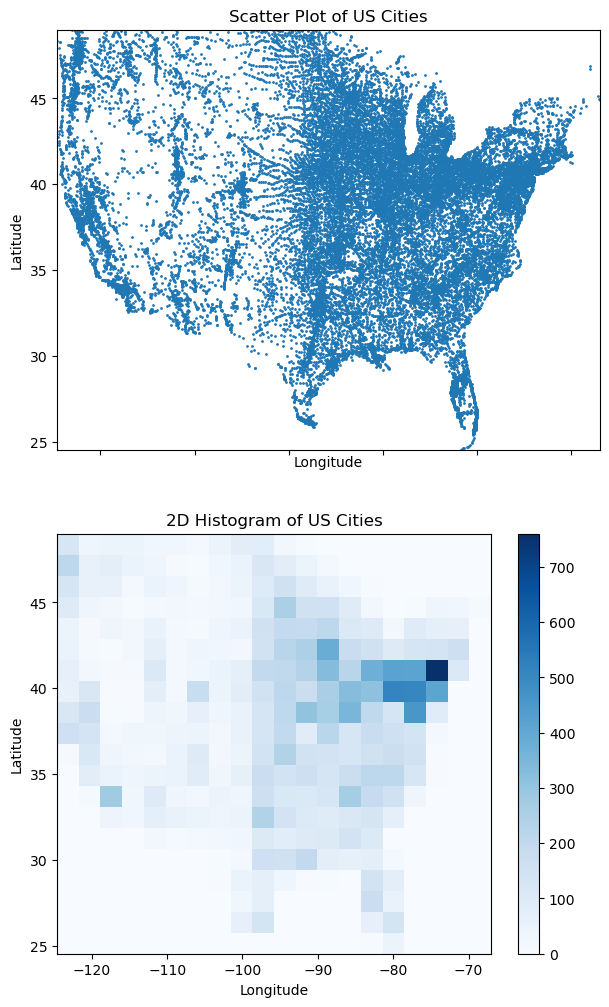

In [54]:
from matplotlib import pyplot as plt
import pandas as pd

url  = 'https://raw.githubusercontent.com/fahadsultan/csc343/refs/heads/main/data/uscities.csv'
data = pd.read_csv(url)
us_mainland = data[(data['state_id'] != 'HI') & \
                   (data['state_id'] != 'AK') & \
                   (data['state_id'] != 'PR')]

fig, ax = plt.subplots(2, 1, figsize=(7, 12), sharex=True, sharey=True)

ax[0].scatter(us_mainland['lng'], us_mainland['lat'], s=1)
ax[0].set_title('Scatter Plot of US Cities')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

a = ax[1].hist2d(us_mainland['lng'], us_mainland['lat'], bins=20, cmap='Blues')
ax[1].set_title('2D Histogram of US Cities')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
fig.colorbar(a[3], ax=ax[1])

plt.show()

In the code above, the `bins` parameter is set to 30, which means that the data will be divided into 30 bins along both the x-axis and y-axis. The `cmap` parameter is set to 'Reds', which specifies the color map used to represent the frequency of data points in each bin. The `plt.colorbar()` function adds a color bar to the plot, which indicates the frequency scale.

`plt.colorbar()` takes as an argument the result of the `plt.hist2d()` function, which is a `QuadMesh` object representing the 2D histogram. The color bar provides a reference for interpreting the color intensity in the histogram, allowing viewers to understand the frequency of data points in each bin based on the color scale.